# Benchmarks Schwarzschild Black Hole (polar coordinates)

<ul id="top">
    <li><a href="#Loading-packages-and-functions">Loading packages and functions</a></li>
    <li><a href="#Initial-value-problem:-Schwarzschild-black-hole">Initial-value-problem:-Schwarzschild-black-hole</a></li> 
    <li><a href="#IRKGL16-integrations">IRKGL16 integrations</a></li>
    <li><a href="#Splitting-integrations">Splitting integrations</a></li>
    <li><a href="#Benchmarks-diagrams">Benchmarks diagrams</a></li>
    <ul>
        <li><a href="#Work-precison-diagrams">Work-precison diagrams</a></li>
        <li><a href="#Error-in-Energy">Error in Energy</a></li>
        <li><a href="#Error-in-Solution">Error in Solution</a></li>
    </ul>
</ul>

## Loading packages and functions

In [1]:
using LinearAlgebra
using Plots


PATH_IRKGL="../../../../IRKGaussLegendre.jl-master/IRKGaussLegendre.jl-master/"
include(string(PATH_IRKGL,"src/IRKGaussLegendre.jl"))
using .IRKGaussLegendre  ## bertsio lokala exekutatzeko  

PATH_Splitting="../../"
include(string(PATH_Splitting,"/src/SplittingMethods.jl"))
using .SplittingMethods  ## bertsio lokala exekutatzeko  

include("../Aux_functions.jl")

lcm_floats_vector (generic function with 1 method)

##### <a href="#top">Back to the top</a>

## Initial value problem: Schwarzschild black-hole

In [2]:
include(string(PATH_IRKGL,"ODEProblems/InitialSchwarzschild.jl"))
include(string(PATH_IRKGL,"ODEProblems/SchwarzschildBH.jl"))

u0, parms = InitialSchwarzschild()
u0_B = BigFloat.(u0)
parms_B = BigFloat.(parms)

t0=0.
tF=1e5  #1e4
tspan=(t0,tF);

<a href="#top">Back to the top</a>

## IRKGL16 integrations

In [3]:
prob = ODEProblem{true,SciMLBase.FullSpecialize}(SchwarzschildODE!, u0, tspan , parms)

HAM=Ham_Schwarzschild
@show(HAM(u0,parms));

HAM(u0, parms) = -0.5


,10.0,12.0,14.0,16.0,18.0,20.0,22.0,24.0,26.0,28.0,30.0

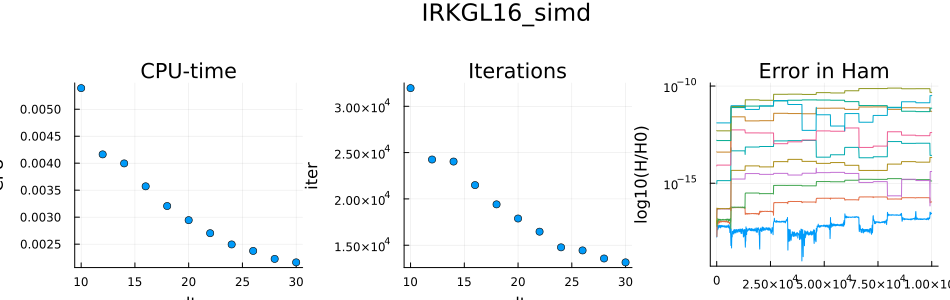

,10.0,12.0,14.0,16.0,18.0,20.0,22.0,24.0,26.0,28.0,30.0

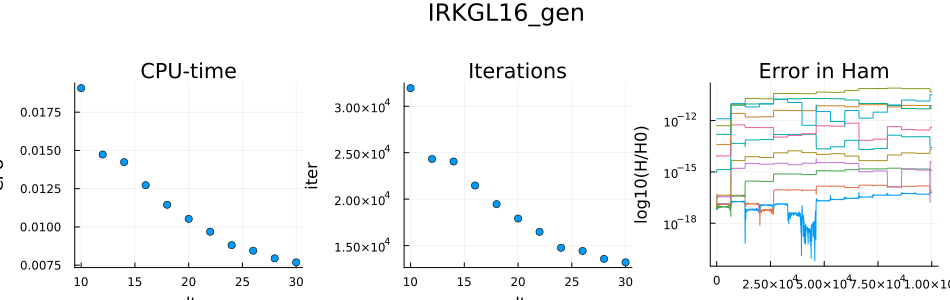

In [4]:
ddt0_irk16=collect(10.:2:30)
nruns=100

alg=IRKGL16(simd=true)
sols_irk16_simd=run_many_IRKGL16(alg, prob, ddt0_irk16, HAM, nruns=nruns)
fig=plots_IRKGL16("IRKGL16_simd",prob,HAM,sols_irk16_simd)
display(fig)
#
alg=IRKGL16(simd=false)
sols_irk16_gen=run_many_IRKGL16(alg,prob,ddt0_irk16,HAM, nruns=nruns)
fig=plots_IRKGL16("IRKGL16_gen",prob,HAM,sols_irk16_gen)
display(fig)

In [5]:
[sols_irk16_simd.dts sols_irk16_simd.retcodes sols_irk16_simd.iters sols_irk16_simd.cpus sols_irk16_simd.MaxΔHlocal]

11×5 Matrix{Float64}:
 10.0  1.0  31959.0  0.00539071  5.44085e-17
 12.0  1.0  24252.0  0.00416349  7.08366e-17
 14.0  1.0  24032.0  0.00399606  5.53662e-16
 16.0  1.0  21490.0  0.00357155  4.12305e-15
 18.0  1.0  19410.0  0.00320632  9.74447e-15
 20.0  1.0  17882.0  0.0029446   1.90714e-13
 22.0  1.0  16461.0  0.0027031   6.63036e-13
 24.0  1.0  14769.0  0.00249473  3.23866e-12
 26.0  1.0  14437.0  0.00237447  7.62524e-12
 28.0  1.0  13566.0  0.00222666  2.58407e-11
 30.0  1.0  13147.0  0.00216248  2.14799e-11

In [6]:
[sols_irk16_gen.dts sols_irk16_gen.retcodes sols_irk16_gen.iters sols_irk16_gen.cpus sols_irk16_gen.MaxΔHlocal]

11×5 Matrix{Float64}:
 10.0  1.0  31952.0  0.0190717   5.54182e-17
 12.0  1.0  24327.0  0.014734    5.71171e-17
 14.0  1.0  24053.0  0.0142364   5.61405e-16
 16.0  1.0  21467.0  0.0127307   4.10797e-15
 18.0  1.0  19456.0  0.0114509   9.75213e-15
 20.0  1.0  17910.0  0.0105283   1.9067e-13
 22.0  1.0  16479.0  0.00968785  6.63042e-13
 24.0  1.0  14763.0  0.00880866  3.2387e-12
 26.0  1.0  14423.0  0.00844807  7.62525e-12
 28.0  1.0  13571.0  0.0079487   2.58407e-11
 30.0  1.0  13191.0  0.00768475  2.148e-11

In [7]:
log(sols_irk16_simd.MaxΔHlocal[4]/sols_irk16_simd.MaxΔHlocal[8])/log(sols_irk16_simd.cpus[8]/sols_irk16_simd.cpus[4])

18.578451848556313

In [8]:
log(sols_irk16_simd.MaxΔHlocal[4]/sols_irk16_simd.MaxΔHlocal[8])/log(ddt0_irk16[4]/ddt0_irk16[8])

16.441175095105475

<a href="#top">Back to the top</a>

## Splitting integrations

In [9]:
include(string(PATH_Splitting,"ODEProblems/InitialSchwarzschild.jl"))
include(string(PATH_Splitting,"ODEProblems/SchwarzschildBH.jl"))

u0, parms = InitialSchwarzschild()
u0_B = BigFloat.(u0)
parms_B = BigFloat.(parms)
HAM=Ham_Schwarzschild

flows=[flowH1Schwarzschild!, flowH2Schwarzschild!, flowH3Schwarzschild!]
prob=SplittingProblem(flows, u0, tspan, parms);

@show HAM(u0,parms)

HAM(u0, parms) = -0.5


-0.5

### Composition methods

In [10]:
ddt0_split=collect(0.5:0.25:5)
nruns=100

s=1; r=2
alg=Splitting_alg(r=r, rkn=false)
sols_split_r2=run_many_Splitting(s, alg, prob, ddt0_split, HAM, nruns=nruns)
#fig=plots_Splitting("Split r=2", alg, prob, HAM, sols_split_r2)
#display(fig)
#
s=5; r=4
alg=Splitting_alg(r=r, rkn=false)
sols_split_r4=run_many_Splitting(s, alg, prob, s*ddt0_split, HAM, nruns=nruns)
#
s=13; r=6
alg=Splitting_alg(r=r, rkn=false)
sols_split_r6=run_many_Splitting(s, alg, prob, s*ddt0_split, HAM, nruns=nruns)
#
s=21; r=8
alg=Splitting_alg(r=r, rkn=false)
sols_split_r8=run_many_Splitting(s, alg, prob, s*ddt0_split, HAM, nruns=nruns)
#
s=35; r=10
alg=Splitting_alg(r=r, rkn=false)
sols_split_r10=run_many_Splitting(s, alg, prob, s*ddt0_split, HAM, nruns=nruns);

,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,3.75,4.0,4.25,4.5,4.75,5.0,2.5,3.75,5.0,6.25,7.5,8.75,10.0,11.25,12.5,13.75,15.0,16.25,17.5,18.75,20.0,21.25,22.5,23.75,25.0,6.5,9.75,13.0,16.25,19.5,22.75,26.0,29.25,32.5,35.75,39.0,42.25,45.5,48.75,52.0,55.25,58.5,61.75,65.0,10.5,15.75,21.0,26.25,31.5,36.75,42.0,47.25,52.5,57.75,63.0,68.25,73.5,78.75,84.0,89.25,94.5,99.75,105.0,17.5,26.25,35.0,43.75,52.5,61.25,70.0,78.75,87.5,96.25,105.0,113.75,122.5,131.25,140.0,148.75,157.5,166.25,175.0

In [11]:
[sols_split_r2.MaxΔHlocal sols_split_r4.MaxΔHlocal sols_split_r6.MaxΔHlocal sols_split_r8.MaxΔHlocal sols_split_r10.MaxΔHlocal] 

19×5 Matrix{Float64}:
 1.56152e-7   2.09048e-8   6.10109e-9       2.77416e-9      2.71707e-9
 5.27058e-7   1.56947e-7   9.73661e-8       9.11773e-8      3.94287e-7
 1.24832e-6   6.60741e-7   5.83146e-7       6.28987e-7      3.49021e-6
 2.43536e-6   2.00476e-6   3.28803e-6       6.15133e-6      3.83622e-5
 4.19908e-6   4.40285e-6   1.11601e-5       3.09665e-5      0.00019356
 6.69016e-6   9.6589e-6    2.96409e-5       0.000104794     0.000376789
 9.97831e-6   1.97317e-5   6.1829e-5        0.000242708     0.00127565
 1.42087e-5   3.6536e-5    0.000153804      0.000706548     0.00182964
 1.94308e-5   5.93525e-5   0.000276567      0.000473738     0.0048753
 2.59492e-5   6.33444e-5   0.000408533      0.00154641      0.00271125
 3.36248e-5   0.000135963  0.000768229      0.00216423      9.55151
 4.20191e-5   0.000187801  0.0013347        0.00186277      0.0107091
 5.34291e-5   0.000209176  0.00157543       0.00461784      0.0111828
 6.39019e-5   0.000398499  0.00225885       0.400416      40

<a href="#top">Back to the top</a>

## Benchmarks diagrams

### Work-precison diagrams

In [12]:
[ddt0_irk16 sols_irk16_simd.MaxΔHlocal  sols_irk16_simd.cpus]

11×3 Matrix{Float64}:
 10.0  5.44085e-17  0.00539071
 12.0  7.08366e-17  0.00416349
 14.0  5.53662e-16  0.00399606
 16.0  4.12305e-15  0.00357155
 18.0  9.74447e-15  0.00320632
 20.0  1.90714e-13  0.0029446
 22.0  6.63036e-13  0.0027031
 24.0  3.23866e-12  0.00249473
 26.0  7.62524e-12  0.00237447
 28.0  2.58407e-11  0.00222666
 30.0  2.14799e-11  0.00216248

In [13]:
[ddt0_split sols_split_r2.MaxΔHlocal sols_split_r2.cpus]

19×3 Matrix{Float64}:
 0.5   1.56152e-7   0.0272801
 0.75  5.27058e-7   0.0182024
 1.0   1.24832e-6   0.0136229
 1.25  2.43536e-6   0.0108887
 1.5   4.19908e-6   0.00906739
 1.75  6.69016e-6   0.00778419
 2.0   9.97831e-6   0.00680886
 2.25  1.42087e-5   0.00609544
 2.5   1.94308e-5   0.00545372
 2.75  2.59492e-5   0.00495911
 3.0   3.36248e-5   0.00454564
 3.25  4.20191e-5   0.00419727
 3.5   5.34291e-5   0.00390105
 3.75  6.39019e-5   0.00368241
 4.0   7.77508e-5   0.00341678
 4.25  9.58084e-5   0.00321436
 4.5   0.000113519  0.0030336
 4.75  0.000128693  0.00287722
 5.0   0.000155733  0.00273248

In [14]:
sols2plot=[sols_irk16_simd, sols_irk16_gen,
           sols_split_r2, sols_split_r4, sols_split_r6, sols_split_r8, sols_split_r10]

labels2plot=["IRKGL16(simd)", "IRKGL16(gen)", 
              "Strang(r=2)", "SUZ90(r=4)", "SS05(r=6)", "SS05(r=8)", "SS05(r=10)"] 

colors2plot=[:red, :blue, :green, :orange, :purple, :cyan, :magenta];

In [15]:
index0=4   # IRKGL16: h=16, index0=4 (exact solution)
idx=10     # IRKGL16: index1=10 optimum step-size

index=[idx]
compute_index_ge_cpu!(index, sols_irk16_simd.cpus[idx], sols2plot[2:end])

for i in 1:length(index)
    
    k=index[i]
    println(k, " , ", labels2plot[i], " , ", sols2plot[i].dts[k], " , ", sols2plot[i].cpus[k])
    
end

10 , IRKGL16(simd) , 28.0 , 0.0022266622700000006
11 , IRKGL16(gen) , 30.0 , 0.0076847463
19 , Strang(r=2) , 5.0 , 0.0027324763399999997
18 , SUZ90(r=4) , 23.75 , 0.0023246289200000007
18 , SS05(r=6) , 61.75 , 0.0022659275699999995
18 , SS05(r=8) , 99.75 , 0.00224443159
18 , SS05(r=10) , 166.25 , 0.00224296447


┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


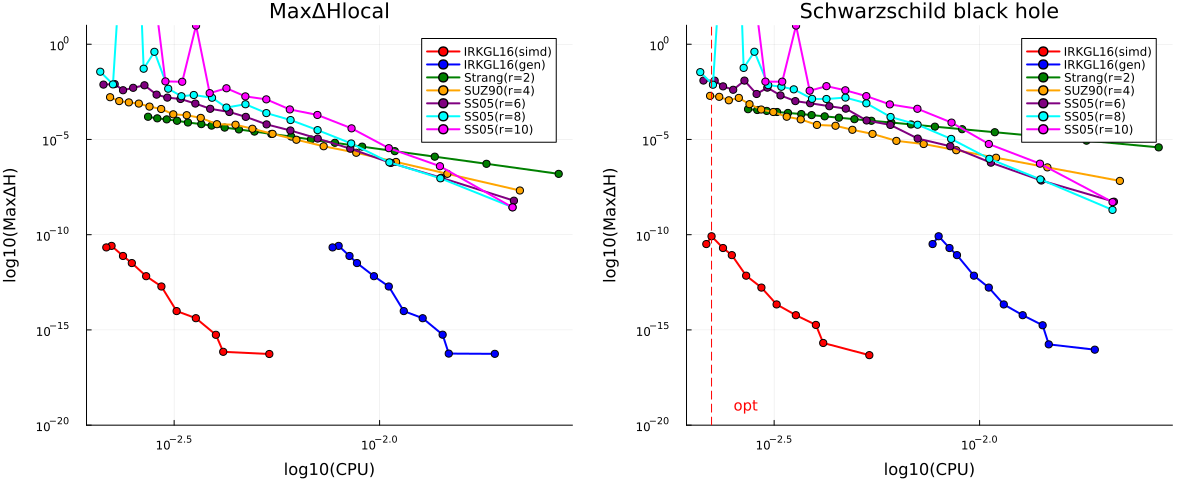

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


In [16]:
yrange=(1e-20, 10)
xrange=(1,50)

sols=sols_irk16_simd
pl1=plot( sols.cpus , sols.MaxΔHlocal, scale=:log10,
          markershape=:circle, lw=2,
          ylimits=yrange, 
          label=labels2plot[1], color=colors2plot[1],
          title="MaxΔHlocal", xlabel="log10(CPU)", ylabel="log10(MaxΔH)")

for i in 2:length(sols2plot)
    
    sols=sols2plot[i]
    
    plot!(pl1, sols.cpus , sols.MaxΔHlocal, 
          markershape=:circle, lw=2,
         label=labels2plot[i], color=colors2plot[i],
         scale=:log10)
    
end

#########################################

sols=sols_irk16_simd
pl2=plot( sols.cpus , sols.MaxΔHglobal, scale=:log10,
         markershape=:circle, lw=2,
         ylimits=yrange, 
         label=labels2plot[1], color=colors2plot[1],
         title="Schwarzschild black hole", xlabel="log10(CPU)", ylabel="log10(MaxΔH)")


for i in 2:length(sols2plot)
    
    sols=sols2plot[i]
    
    plot!(pl2, sols.cpus , sols.MaxΔHglobal, 
          markershape=:circle, lw=2,
          label=labels2plot[i], color=colors2plot[i],
          scale=:log10)

end

vline!(pl2, [sols_irk16_simd.cpus[index[1]]], line=:dash, label="", color=:red)
annotate!((sols_irk16_simd.cpus[index[1]]+0.12, 0.05), text("opt", :red, 10, :center))

plot(pl1, pl2, layout=(1,2), size=(1200,500), 
    bottom_margin=10Plots.mm,
    left_margin=5Plots.mm, right_margin=5Plots.mm)

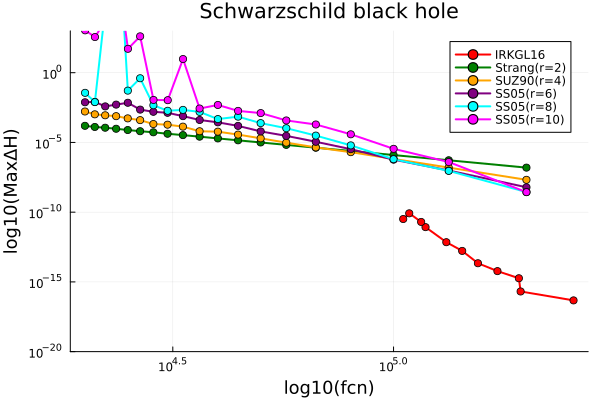

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


In [17]:
yrange=(1e-20, 1e3)
xrange=(1,50)

fcn=8*(sols_irk16_simd.iters)

sols=sols_irk16_simd
pl3=plot( fcn , sols.MaxΔHglobal, scale=:log10,
         markershape=:circle, lw=2,
         ylimits=yrange,    
         label="IRKGL16", color=colors2plot[1],
         title="Schwarzschild black hole", 
         xlabel="log10(fcn)", ylabel="log10(MaxΔH)",
         guidefont=font(12), labelsize=10)


for i in 3:length(sols2plot)
       
   sols=sols2plot[i]
    
   if occursin("rkn", labels2plot[i])
       plot!(pl3, sols.nflowsH3 , sols.MaxΔHlocal, 
       markershape=:xcross, lw=2, ls=:dash,
       label=labels2plot[i], color=colors2plot[i],
       scale=:log10)
        
   else 
       plot!(pl3, sols.nflowsH3 , sols.MaxΔHlocal, 
             markershape=:circle, lw=2,
             label=labels2plot[i], color=colors2plot[i],
             scale=:log10)
   end

end

display(pl3)

In [18]:
#savefig("./figures/Fig1a.pdf")

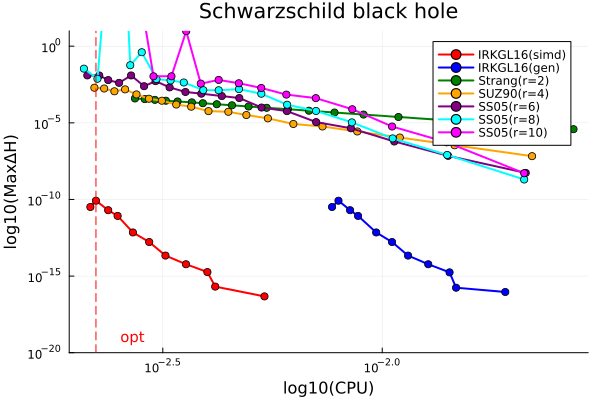

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


In [19]:
plot(pl2)

In [20]:
#savefig("./figures/Fig1b.pdf")

<a href="#top">Back to the top</a>

### Error in Energy

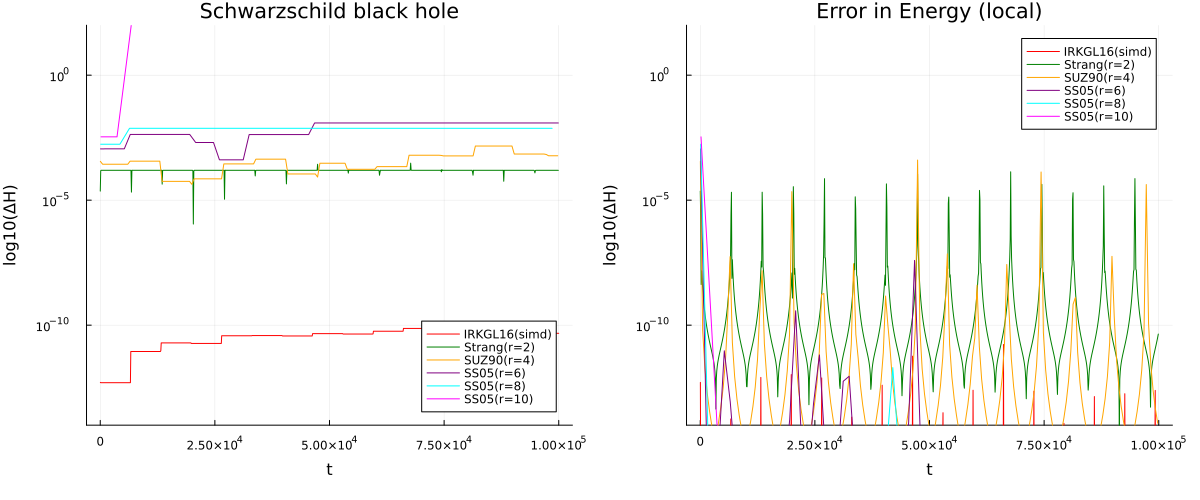

In [21]:
yrange=(1e-14, 1e2)


onesols2plot=[sols_irk16_simd.sols[index[1]], sols_split_r2.sols[index[3]], sols_split_r4.sols[index[4]],
              sols_split_r6.sols[index[5]],   sols_split_r8.sols[index[6]], sols_split_r10.sols[index[7]]]


HAM=Ham_Schwarzschild   # IRKGL16
H0=HAM(u0_B,parms_B)


H = [HAM(BigFloat.(u),parms_B) for u in sols_irk16_simd.sols[index[1]].u]
ΔH0 = @. Float64(abs(H/H0-1))
ΔH0loc = @. Float64(abs((H[2:end] / H[1:end-1]) - 1))

m0 = max(1,div(Int64(ceil((tF-t0)/ddt0_irk16[index[1]])),1000))

pl3=plot(sols_irk16_simd.sols[index[1]].t[2:m0:end], abs.(ΔH0[2:m0:end]),
        ylimits=yrange,
        xlabel="t", ylabel="log10(ΔH)",title="Schwarzschild black hole",
        label=labels2plot[1],color=colors2plot[1],
        yscale=:log10, legend=:bottomright)

pl4=plot(sols_irk16_simd.sols[index[1]].t[2:m0:end], abs.(ΔH0loc[1:m0:end]),
        ylimits=yrange,
        xlabel="t", ylabel="log10(ΔH)",title="Error in Energy (local)",
        label=labels2plot[1],color=colors2plot[1],
        yscale=:log10)

# splitting

HAM=Ham_Schwarzschild   # Splitting
H0=HAM(u0_B,parms_B)

for k in 2:length(onesols2plot)
    m0 = max(1,div(Int64(ceil((tF-t0)/ddt0_split[index[k+1]])),1000))
    solk=onesols2plot[k]
    labelk=labels2plot[k+1]
    colork=colors2plot[k+1]
    H = [HAM(BigFloat.(u),parms_B) for u in solk.u]
    ΔH0 = @. Float64(abs(H/H0-1))
    ΔH0loc = @. Float64(abs((H[2:end] / H[1:end-1]) - 1))
    plot!(pl3, solk.t[2:m0:end], abs.(ΔH0[2:m0:end]), yscale=:log10, label=labelk, color=colork)
    plot!(pl4, solk.t[2:m0:end], abs.(ΔH0loc[1:m0:end]), yscale=:log10, label=labelk, color=colork)
end


fig=plot(pl3, pl4, layout=(1,2), size=(1200,500), 
    bottom_margin=10Plots.mm,
    left_margin=5Plots.mm, right_margin=5Plots.mm)

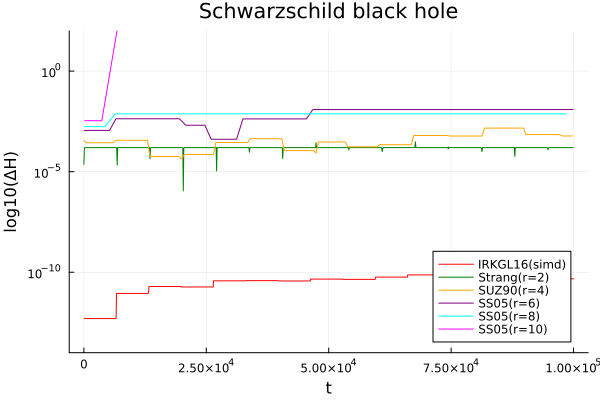

In [22]:
plot(pl3)
#savefig("./figures/Fig1c.pdf")

<a href="#top">Back to the top</a>

### Error in Solution

In [23]:
errors2plot=[sols_irk16_simd.sols[index[1]], sols_split_r2.sols[index[3]], sols_split_r4.sols[index[4]],
              sols_split_r6.sols[index[5]],   sols_split_r8.sols[index[6]], sols_split_r10.sols[index[7]]]

ddt02plot=[sols_irk16_simd.dts[index[1]], sols_split_r2.dts[index[3]], sols_split_r4.dts[index[4]],
           sols_split_r6.dts[index[5]],   sols_split_r8.dts[index[6]], sols_split_r10.dts[index[7]]]

labels2plot_er=["IRKGL16(simd)",  
              "Strang(r=2)", "SUZ90(r=4)", "SS05(r=6)", "SS05(r=8)", "SS05(r=10)"] 

colors2plot_er=[:red, :green, :orange, :purple, :cyan, :magenta];

k=1,IRKGL16(simd),[112.0, 224.0, 336.0]
k=1,IRKGL16(simd),[112.0, 224.0, 336.0]
*****************************
k=2,IRKGL16(gen),[80.0, 160.0, 240.0]
k=2,IRKGL16(gen),[80.0, 160.0, 240.0]
*****************************
k=3,Strang(r=2),[1520.0, 3040.0, 4560.0]
k=3,Strang(r=2),[1520.0, 3040.0, 4560.0]
*****************************
k=4,SUZ90(r=4),[3952.0, 7904.0, 11856.0]
k=4,SUZ90(r=4),[3952.0, 7904.0, 11856.0]
*****************************
k=5,SS05(r=6),[6384.0, 12768.0, 19152.0]
k=5,SS05(r=6),[6384.0, 12768.0, 19152.0]
*****************************
k=6,SS05(r=8),[10640.0, 21280.0, 31920.0]
k=6,SS05(r=8),[10640.0, 21280.0, 31920.0]
*****************************


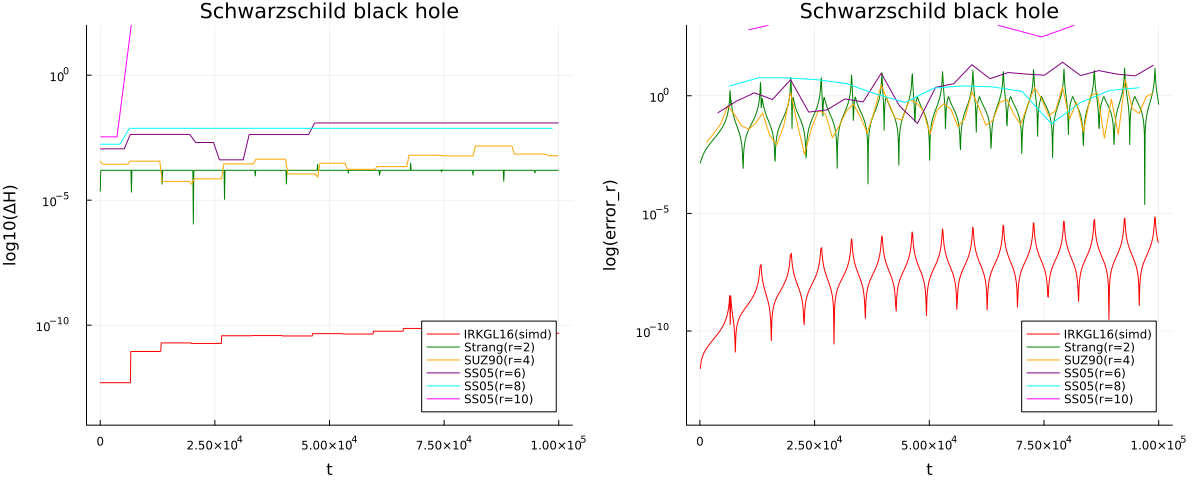

In [24]:
yrange=(1e-14, 1e3)

pe1=plot(title="Schwarzschild black hole", yscale=:log10,
         ylims=yrange,
         legend=:bottomright,
         xlabel="t", ylabel="log(error_r)")

for k in 1:length(errors2plot)
    
    w=lcm_floats_vector(vcat(ddt0_irk16[index0],ddt02plot[k]))
    ii=Int64.(w./(vcat(ddt0_irk16[index0],ddt02plot[k]))).+1
    
    v0=sols_irk16_simd.sols[index0].t[ii[1]:ii[1]-1:3*ii[1]] 
    v1=errors2plot[k].t[ii[2]:ii[2]-1:3*ii[2]]
    
    println("k=", k, ",",labels2plot[k],",", v0 )
    println("k=", k, ",",labels2plot[k],",", v1 )
    println("*****************************")
    
    error= map((u,u1)-> abs(BigFloat(u[1])/BigFloat(u1[1])-1),
                errors2plot[k].u[ii[2]:ii[2]-1:end], sols_irk16_simd.sols[index0].u[ii[1]:ii[1]-1:end])
      
    plot!(pe1, sols_irk16_simd.sols[index0].t[ii[1]:ii[1]-1:end], error,
          label=labels2plot_er[k],color=colors2plot_er[k])
    
end

fig=plot(pl3, pe1, layout=(1,2), size=(1200,500), 
    bottom_margin=10Plots.mm,
    left_margin=5Plots.mm, right_margin=5Plots.mm)


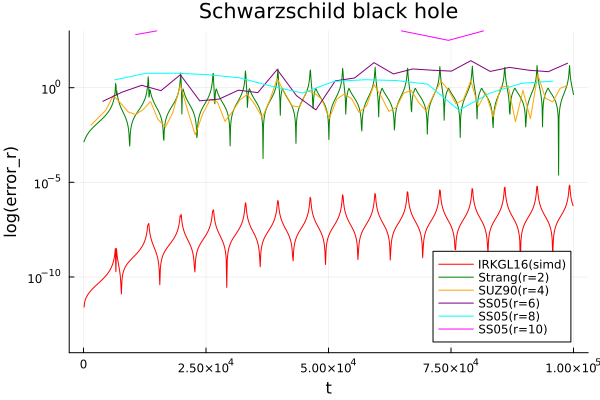

In [25]:
plot(pe1)

In [26]:
#savefig("./figures/Fig1d.pdf")